## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
mouse_study_df.head()

mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group dataframe by Drug Regimen
stats_table = mouse_study_df.groupby("Drug Regimen")
# Show Tumor Volume mean
stats_table = stats_table["Tumor Volume (mm3)"]

# Create median of Tumor Volume
volume_median = stats_table.median()

# Create mean of Tumor Volume
volume_mean = stats_table.mean()

# Create variance of Tumor Volume
volume_variance = stats_table.var()

# Crate standard deviation of Tumor Volume
volume_stdev = stats_table.std()

In [3]:
# Create SEM of Tumor Volume

# Rename Tumor Volume Column, to pass through functions more easily
renamed = mouse_study_df.rename(columns={"Tumor Volume (mm3)":"Tumor_Volume"})

# Create samples
nsamples = 10
size = 20
samples = [renamed.sample(size) for x in range(0,nsamples)]

# Calculate means of samples
means = [s.Tumor_Volume.mean() for s in samples]

# Calculate standard error of means
volume_SEM = [sem(s.Tumor_Volume) for s in samples]

In [4]:
# Create summary table as data frame
Summary_Table = pd.DataFrame({
    "Tumor Volume Mean": volume_mean,
    "Tumor Volume Median": volume_median,
    "Tumor Volume Variance": volume_variance,
    "Tumor Volume Standard Deviation": volume_stdev,
    "Tumor Volume SEM": volume_SEM
})
Summary_Table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.505662
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.537951
Infubinol,52.884795,51.820584,43.128684,6.567243,2.045977
Ketapril,55.235638,53.698743,68.553577,8.279709,1.734038
Naftisol,54.331565,52.509285,66.173479,8.134708,2.285164
Placebo,54.033581,52.288934,61.168083,7.821003,1.982300
Propriva,52.322552,50.854632,42.351070,6.507770,2.244764
Ramicane,40.216745,40.673236,23.486704,4.846308,1.789256
Stelasyn,54.233149,52.431737,59.450562,7.710419,1.774433


## Bar plots

Text(0, 0.5, 'Tumor Volume Stats (in mm3)')

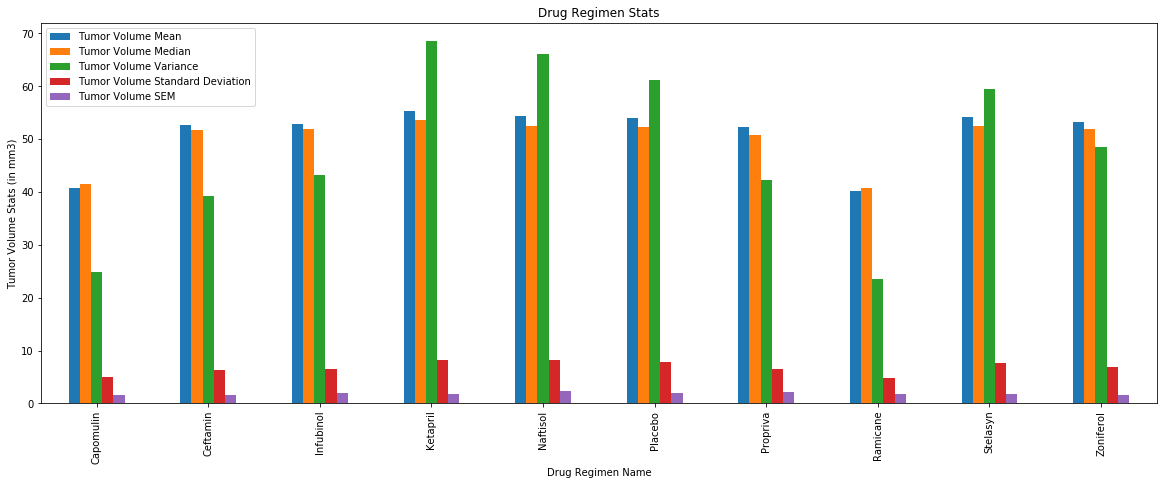

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Generate plot
Summary_Table.plot(kind="bar", figsize=(20,7))

# Set a Title and labels
plt.title("Drug Regimen Stats")
plt.xlabel("Drug Regimen Name")
plt.ylabel("Tumor Volume Stats (in mm3)")

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis values to drug regimen names
# x_axis = [Summary_Table.index.tolist()]
x_axis = [["Capomulin"], ["Ceftamin"]]

# Set y axis values to values in Summary Table
# y_axis = [[],[]]
y_axis = [[40.67574114100001, 41.557808879999996, 24.947764120254785, 4.994773680584014, 1.7667281283465466], [2.59117180960677, 51.77615728000001, 39.29017727327859, 6.268187718414198, 1.7436634739058527]]

plt.bar(x_axis, y_axis)

In [6]:
# Y Axis: Create a list of lists to hold data values from summary table

newList = []                                      # Create empty outer list to hold all lists of values for all drug regimens
for x in range(0,10):                             # Create a for loop, where x is equal to the number of rows (drug regimens)
    innerlist = []                                # Create an empty inner list, to hold values for a single row (drug regimen)
    for y in range(0,5):                          # Create an inner for loop, where y is equal to the number of columns (drug regimen data)
        y_value = Summary_Table.iloc[x,y]         # Set y_value equal to the x,y coordinates of summary table, to hold data from that row/column combination.
        innerlist.append(y_value)                 # Add y_value to inner list 
    newList.append(innerlist)                     # Append inner list (values of single drug regimen) to outer list
print(newList)

[[40.67574114100001, 41.557808879999996, 24.947764120254785, 4.994773680584014, 1.5056621817936289], [52.59117180960677, 51.77615728000001, 39.29017727327859, 6.268187718414198, 1.5379508301734415], [52.88479510859551, 51.82058438, 43.128684128836106, 6.567243267066944, 2.0459772587006504], [55.23563764047869, 53.698742644999996, 68.55357711244599, 8.279708757706759, 1.7340376483323634], [54.331564658333306, 52.509284609999995, 66.17347898736506, 8.134708291473338, 2.2851638525023805], [54.03358078635358, 52.28893409, 61.168082936697, 7.821002681031186, 1.9822995630520632], [52.3225520357764, 50.8546323, 42.351069633638154, 6.5077699432016, 2.2447636734480936], [40.2167450667105, 40.67323554, 23.486703952095297, 4.8463082807530204, 1.789255967160869], [54.23314911988949, 52.43173664, 59.45056167336601, 7.710419033578266, 1.774432792316791], [53.236506551593415, 51.818479325, 48.5333553893861, 6.966588504381905, 1.583576616884507]]


## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas




In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Isolate mouse sex column as scalar
gender = mouse_study_df["Sex"]

# Find count of female mice
female = gender.loc[gender=="Female"].count()

# Find count of male mice
male = gender.loc[gender=="Male"].count()

# labels for each section of pie chart
labels = ["Female", "Male"]

# values of each section
sizes = [female, male]

# colors of each section of the pie chart
colors = ["beige", "lightcoral"]

# explode
explode = (0.1, 0)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen